<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 6 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 10 October 2019, with material from John Salvatier, Thomas V. Wiecki, Christopher Fonnesbeck</div>


# Bayesian linear estimation lab

In probabilistic programming, we specify ***variables as probability distributions*** and condition variables on other variables and on observations. It's a powerful tool for building **data models**.
 
`PyMC3` is an open source probabilistic programming framework written in Python.

If you have problems running pymc3, you can also run the notebook on [Google](https://colab.research.google.com/notebook) or on [Azure](https://notebooks.azure.com/).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

## Random processes

The underlying principle of machine learning and artificial intelligence is nothing but statistical mathematics and linear algebra. In statistical math, there are some functions you should know of.

A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, ***discrete*** and ***continuous***.

A **discrete random variable** is one which may take on only a countable number of distinct values and thus can be quantified. For example, you can define a random variable X to be the number which comes up when you roll a fair dice. X can take values : [1,2,3,4,5,6] and therefore is a discrete random variable.

</br >
<center>
<img src="images/red-dice.gif" width=300 />
</center>


A **continuous random variable** is one which takes an ***infinite number*** of possible values. For example, you can define a random variable $X$ to be the height of students in this class. Since the continuous random variable is defined over an interval of values, it is represented by the **area** under a curve (or the **integral**).

The probability distribution of a continuous random variable, known as **probability distribution functions**, are the functions that take on continuous values. 

- Note: The probability of observing any single value is always 0 since the number of values which may be assumed by the random variable is infinite.

For example, a random variable X may take all values over an interval of real numbers. Then the probability that $X$ is in the set of outcomes A,P(A), is defined to be the area above A and under a curve. The curve, which represents a function $p(x)$, must satisfy the following:

- The curve has no negative values ($p(x)>0$ for all $x$)

- The total area under the curve is equal to 1.

A curve meeting these requirements is often known as a **density curve**.

***You should know about the following density curves*** because we talked about these data models (the Beta is on deck).

</br >
<center>
<img src="images/distributions.png" width=900 />
</center>

We plot them below. One of the most difficult things to wrap your head around as a beginner statistician is that random processes often yield histograms that ***are not*** random. [Here](https://www.mathsisfun.com/data/quincunx.html)'s the proof.

And here are various histograms for well-understood ***random data generating models***.

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [3]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# Part 1: Common distributions

We vist the most commond distributions. You need to know these. Not their formulas exactly, but what they are used for.

## Uniform distribution

Perhaps one of the simplest and useful distribution is the uniform distribution. 

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve.

We use Seaborn’s distplot to plot the histogram of the distribution you just created. Seaborn’s `distplot` takes in multiple arguments to customize the plot. You first create a plot object ax. Here, you can specify the number of bins in the histogram, specify the color of the histogram and specify density plot option with kde and linewidth option with hist_kws. You can also set labels for x and y axis using the xlabel and ylabel arguments.

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

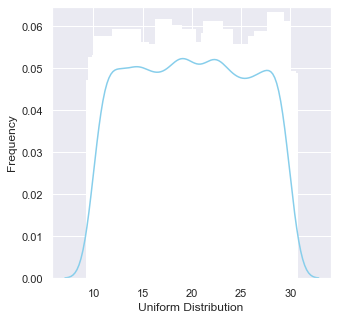

In [4]:
# import uniform distribution
from scipy.stats import uniform

# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Normal distribution

Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean μ and standard deviation  σ.

Almost 68% of the data falls within a distance of one standard deviation from the mean on either side and 95% within two standard deviations. Also it worth mentioning that a distribution with mean 0 and standard deviation 1 is called a standard normal distribution.

You can generate a normally distributed random variable using `scipy.stats` module's `norm.rvs()` method. The `loc` argument corresponds to the mean of the distribution. scale corresponds to standard deviation and size to the number of random variates. If you want to maintain reproducibility, include a random_state argument assigned to a number.

In [5]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

## Gamma distribution

The gamma distribution is a two-parameter family of continuous probability distributions. While it is used rarely in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution. The gamma distribution can be parameterized in terms of a shape parameter α=k and an inverse scale parameter β=1/θ, called a rate parameter., the symbol Γ(n) is the gamma function and is defined as (n−1)! :

You can generate a gamma distributed random variable using `scipy.stat` module's `gamma.rvs()` method which takes shape parameter a as its argument. When a is an integer, gamma reduces to the Erlang distribution, and when a=1 to the exponential distribution. To shift distribution use the loc argument, to scale use scale argument, size decides the number of random variates in the distribution. If you want to maintain reproducibility, include a random_state argument assigned to a number.

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

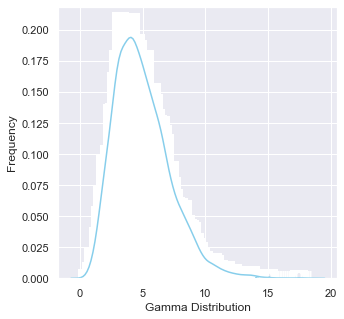

In [6]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## Exponential distribution

The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter λ called rate parameter.

You can generate an exponentially distributed random variable using `scipy.stats` module's `expon.rvs()` method which takes shape parameter scale as its argument which is nothing but 1/lambda in the equation. To shift distribution use the loc argument, size decides the number of random variates in the distribution. If you want to maintain reproducibility, include a random_state argument assigned to a number.

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

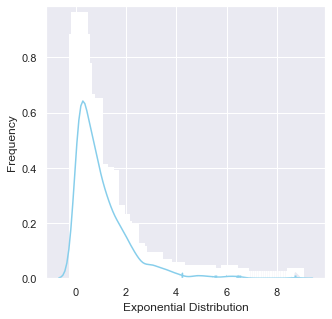

In [7]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson Distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated λ (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the Poisson equation

Note that the normal distribution is a limiting case of Poisson distribution with the parameter λ→∞. Also, if the times between random events follow an exponential distribution with rate λ, then the total number of events in a time period of length t follows the Poisson distribution with parameter λt.

You can generate a poisson distributed discrete random variable using `scipy.stats` module's `poisson.rvs()` method which takes μ as a shape parameter and is nothing but the λ in the equation. To shift distribution use the loc parameter. size decides the number of random variates in the distribution. If you want to maintain reproducibility, include a random_state argument assigned to a number.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

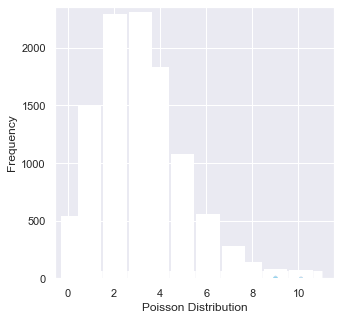

In [8]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binomial distribution

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a Binomial Distribution. However, The outcomes need not be equally likely, and each trial is independent of each other. The parameters of a binomial distribution are n and p where n is the total number of trials, and p is the probability of success in each trial.

You can generate a binomial distributed discrete random variable using `scipy.stats` module's `binom.rvs()` method which takes n (number of trials) and p (probability of success) as shape parameters. To shift distribution use the `loc` parameter. size decides the number of times to repeat the trials. If you want to maintain reproducibility, include a random_state argument assigned to a number.

We'll plot a probability of success greater than 0.5, so the distribution will be skewed towards the right side. Also, poisson distribution is a limiting case of a binomial distribution under the following conditions:

The number of trials is indefinitely large or n→∞.
The probability of success for each trial is same and indefinitely small or p→0.
np=λ, is finite.
Normal distribution is another limiting form of binomial distribution under the following conditions:

The number of trials is indefinitely large, n→∞.
Both p and q are not indefinitely small.

In [9]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

## Bernoulli distribution

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable X which has a Bernoulli distribution can take value 1 with the probability of success, p, and the value 0 with the probability of failure, q or 1−p. The probabilities of success and failure need not be equally likely. The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (n=1). 

You can generate a bernoulli distributed discrete random variable using `scipy.stats` module's `bernoulli.rvs()` method which takes p (probability of success) as a shape parameter. To shift distribution use the loc parameter. size decides the number of times to repeat the trials. If you want to maintain reproducibility, include a random_state argument assigned to a number.

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

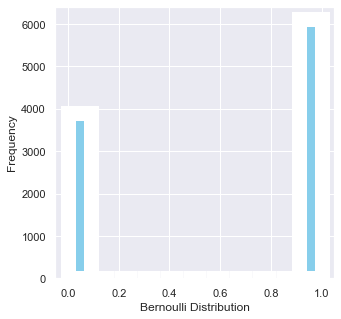

In [10]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Part 2: Bayesian Linear Regression

We'll build a simple Bayesian **linear regression model**. $X$ are the ***independent*** variables, and $Y$ the ***dependent*** outcome.

We are interested in predicting outcomes $Y$ as ***normally-distributed observations*** with an expected value $μ$ that is a ***linear*** function of ***two predictor variables***, $X1$ and $X2$. So we have a **multi-variate** use case. 

This is how we do it: ***the mean of the normal distribution is modelled as a linear function of the independent variables***.

$$\begin{split}\begin{aligned}
Y  &\sim \mathcal{N}(\mu, \sigma^2) \\
\mu &= \alpha + \beta_1 X_1 + \beta_2 X_2
\end{aligned}\end{split}$$

$α$ is called the **intercept**, and $β_i$ is the **coefficient** for covariate $X_i$, while $σ$ represents the observation error. 

Since we are constructing a **Bayesian model**, we must assign a **prior distribution** to the unknown variables in the model. We choose **zero-mean normal priors** with variance of 100 for both regression coefficients, which corresponds to **weak information** regarding the true parameter values. We choose a half-normal distribution (normal distribution bounded at zero) as the prior for $σ$.

$$\begin{split}\begin{aligned}
\alpha &\sim \mathcal{N}(0, 100) \\
\beta_i &\sim \mathcal{N}(0, 100) \\
\sigma &\sim \lvert\mathcal{N}(0, 1){\rvert}
\end{aligned}\end{split}$$

This kind of Bayesian data modeling is the equivalent of a random-forest in ML. It's your ***go-to Bayesian estimation model when you have a lot of different independent variables $X$***.

## 1. Let's simulate some data

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor (independent) variables
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome (dependent) variable
Y = alpha + beta[0]*X1 + beta[1]*X2
#beta[x] simulate for different  x values

Let's plot the data.

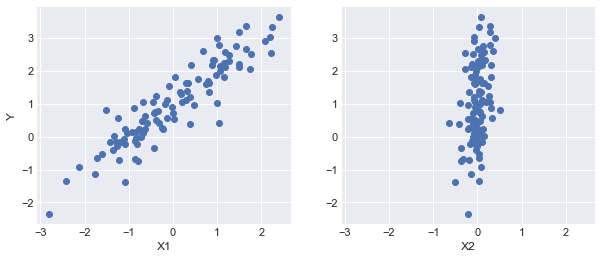

In [12]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

## 2. Let's add some noise, for a degree of realism.

In [20]:
# True parameter values
alpha, sigma = 1, 2 #noise
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor (independent) variables
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome (dependent) variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

and plot.

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

## 3. Let's build a Bayesian model

For help on any PyMC3 API, run `help()`. For example, for help on the Normal API:
```python
help(pm.Normal)
```

In [23]:
import pymc3 as pm
help(pm.Normal)

Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Normal(name, *args, **kwargs)
 |  
 |  Univariate normal log-likelihood.
 |  
 |  The pdf of this distribution is
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      plt.style.use('seaborn-darkgrid')
 |      x = np.linspace(-5, 5, 1000)
 |      mus = [0., 0., 0., -2.]
 |      sigmas = [0.4, 1., 2., 0.4]
 |      for mu, sigma in zip(mus, sigmas):
 |          pdf = st.norm.pdf(x, mu, sigma)
 |          plt.plot(x, pdf, labe

In [24]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

# Create a new Model object which is a container for the model random variables
basic_model = pm.Model()

# Create a context manager, with our basic_model as the context, that includes all statements until the indented block ends.
# This means all PyMC3 objects introduced in the indented code block below the `with` statement are added to the model 
# behind the scenes. Without this context manager idiom, we would be forced to manually associate each of the variables 
# with basic_model right after we create them 
with basic_model:

    # Priors for unknown model parameters: Create stochastic random variables with Normal prior distributions 
    # for the regression coefficients, with a mean of 0 and standard deviation of 10, and a half-normal distribution 
    # for the standard deviation of the observations.
    # Most commonly used distributions, such as Beta, Exponential, Categorical, Gamma, Binomial and many others, 
    # are available in PyMC3.
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
                      
    # The beta variable has an additional shape argument to denote it as a vector-valued parameter of size 2. 
    # The shape argument is available for all distributions and specifies the length or shape of the random variable, 
    # but is optional for scalar variables, since it defaults to a value of one. It can be an integer, to specify an array, 
    # or a tuple, to specify a multidimensional array (e.g. shape=(5,7) makes random variable that takes on 5 by 7 matrix 
    # values)

    # Expected value of outcome: This creates a *deterministic* random variable, which implies that its value is completely 
    # determined by its parents’ values. That is, there is no uncertainty beyond that which is inherent in the parents’ 
    # values. Here, mu is just the sum of the intercept alpha and the two products of the coefficients in beta and the 
    # predictor variables
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    # Y_obs is a stochastic variable that we call an *observed* stochastic, and represents the data likelihood of the model.
    # It is identical to a standard stochastic, except that its observed argument, which passes the data to the variable, 
    # indicates that the values for this variable were *observed*, and should not be changed by any fitting algorithm 
    # applied to the model. The data can be passed in the form of either a numpy.ndarray or pandas.DataFrame object
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Running on PyMC3 v3.7


## 4. Computing posterior estimates

Having completely specified our model, the next step is to obtain **posterior estimates** for the **unknown variables** in the model. 

Ideally, we could calculate the posterior estimates analytically, but for most non-trivial models, ***this is not feasible***. 

We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: 
* Finding the **maximum a posteriori** (MAP) point using optimization methods
* Computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods.

### MAP

The [Maximum a Posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) is returned as a parameter **point**.

By default, pymc3;s `find_MAP` API uses the [Broyden–Fletcher–Goldfarb–Shanno](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) (BFGS) optimization algorithm to find the maximum of the log-posterior but also allows selection of *other* optimization algorithms from the `scipy.optimize` module. For example:
```python
map_estimate = pm.find_MAP(model=basic_model, method='powell')
```

Most techniques for finding the MAP estimate also only find a **local optimum** (which is often good enough), but can fail badly for multimodal posteriors if the different modes are meaningfully different.

In [25]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -217.84, ||grad|| = 14.887: 100%|██████████| 19/19 [00:00<00:00, 368.87it/s]  


{'alpha': array(1.06305308),
 'beta': array([0.88040831, 4.58341006]),
 'sigma_log__': array(0.59664489),
 'sigma': array(1.81601563)}

So let's get each estimated value:

In [26]:
map_estimate['alpha']

array(1.06305308)

Notice that our prior for `alpha` was a wide Normal centered at 0 (so really, our initial giess was 0). Our posterior is `map_estimate['alpha']`, quite far from our prior guess.

In [27]:
map_estimate['sigma']

array(1.81601563)

Notice that our prior for sigma was a half Normal with a standard deviation of 1. Our MAP estimate is the number `map_estimate['sigma']`, not too far from 1.

And our list of mu posteriors (`mus`), one for each datapoint:

In [28]:
mus = map_estimate['alpha'] + map_estimate['beta'][0]*X1 + map_estimate['beta'][1]*X2
len(mus)

100

In [29]:
mus

array([ 1.46174565, -0.32069243,  1.91688381,  0.97947634, -0.36666537,
        2.07083874,  1.4051544 , -1.4729562 ,  0.28003689,  2.97688885,
        1.87953649,  0.66506135, -0.79257258,  2.17179227,  1.2548093 ,
        0.46209148,  0.08464512,  1.71839124,  0.93656564,  1.50437023,
        2.1260958 , -1.17769818,  1.6663987 ,  0.87513693,  1.17536679,
        1.25182989,  0.0992706 ,  2.24864416, -1.31010204,  2.39751042,
       -0.25997981,  2.94134164,  0.52311333, -2.01377371,  1.48898051,
        0.83870655,  2.78341835,  2.4632001 ,  0.56060839,  1.59564005,
       -1.81955236,  0.57601469, -0.73292996,  0.65461622,  1.59295653,
        1.45070153, -0.12410784,  2.34634627,  0.5467771 ,  0.79533166,
        2.86360355,  0.30242718,  1.11433591,  0.19079094,  1.32589866,
       -1.79292072,  1.00407525,  1.71481853, -1.07437315,  1.24133159,
       -0.37743843, -1.20641506,  0.4204401 , -0.83262409,  2.77251535,
        0.26605059,  0.59216441,  0.47019051,  2.54320314,  2.28

And now let's get the data-generating pdf that should generate data that looks like our observed data. We use `truncnorm` from SciPy to truncate data to our observation range.

What does that process look like? This is how we generate 10,000 random values from a normal pdf with mean 90 and standard deviation of 2:

In [30]:
import numpy as np
import matplotlib.pyplot as plt

values = np.random.normal(90, 2, 10000)
plt.plot(values)
plt.show()

And this is how we get the histogram (50 bins) of these values, which **should look like a gaussian (normal)**, right?

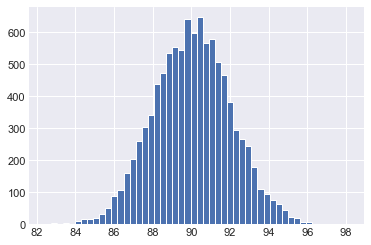

In [31]:
plt.hist(values, 50)
plt.show()

Ok, let's do the same thing with our model!

In [32]:
from scipy.stats import truncnorm #truncate to a lower or a upper bound.

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [33]:
Y_MAPs = [get_truncated_normal(mean=mux, sd=map_estimate['sigma'], low=-2, upp=3) for mux in mus]
#random_variates_Y_MAP = Y_MAP.rvs(100)
Y_MAPs[0]

That was our generating functions! Now let's generate some data!

In [34]:
Y_MAPs_random_variates = [Y_MAPs[i].rvs() for i in range(100)]
len(Y_MAPs_random_variates)

100

And now let's plot fake data..

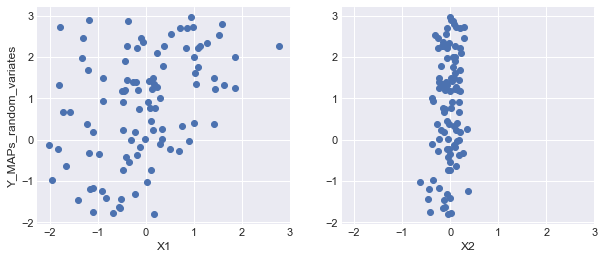

In [35]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y_MAPs_random_variates)
axes[1].scatter(X2, Y_MAPs_random_variates)
axes[0].set_ylabel('Y_MAPs_random_variates'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

Not bad!

But MAP is of ***limited use*** because there is no **associated estimate of uncertainty** produced with the MAP estimates. 

A simulation-based approach such as Markov chain Monte Carlo (MCMC) give us *estimates* **as well as** *uncertainties* on those estimates.

For PyMC3, method auto-assignment is based on the attributes of each variable in the model. In general:

*    Binary variables will be assigned to `BinaryMetropolis`
*    Discrete variables will be assigned to `Metropolis`
*    Continuous variables will be assigned to`NUTS`

PyMC3’s **most capable** step method is the No-U-Turn Sampler (NUTS). NUTS is especially useful on models that have many continuous parameters, a situation where other MCMC algorithms work very slowly. It takes advantage of information about where regions of higher probability are, based on the gradient of the log posterior-density. This helps it achieve dramatically faster convergence on large problems than traditional sampling methods can achieve. 

In [36]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 890.82draws/s] 
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


The `trace` object contains the samples collected, in the order they were collected. It can be queried in a similar way to a dict containing a map from variable names to numpy.arrays. The first dimension of the array is the sampling index and the later dimensions match the shape of the variable. We can see the last 5 values for the alpha variable as follows:

This gives us the guesses for `alpha'`past the first 1000 ones. We always throw out the first 20% or so of data because we know that as we start our search for the golbal optimum in state space, our first steps are usually far away from the solution.  

In [40]:
np.asarray(trace['alpha']).shape

(1000,)

In [41]:
trace['alpha'][:1000]

array([0.93000574, 1.12666372, 1.04203374, 0.89973751, 1.17446104,
       0.93925767, 1.07907841, 0.8768657 , 1.06286194, 1.00843226,
       1.02115268, 0.98195313, 1.37844937, 0.74815652, 1.42529604,
       0.71165419, 1.28402031, 0.93088364, 1.29347259, 1.09134472,
       1.15923641, 1.08072863, 1.36707604, 0.72319313, 0.92764621,
       0.72379572, 1.34732447, 1.02260333, 1.03517299, 1.15371221,
       0.97518061, 1.26858666, 0.9685786 , 1.0888197 , 0.98031877,
       0.85360641, 0.80536094, 1.27210216, 0.85489638, 0.69739495,
       1.46554111, 0.77155256, 1.08100409, 0.951368  , 0.99006851,
       0.87427802, 0.85093107, 0.99877112, 1.24743105, 0.88584065,
       1.27744691, 1.10106068, 1.01041314, 1.22614595, 0.84629854,
       0.87213538, 1.41340115, 1.2590592 , 0.89472637, 0.89472637,
       1.39415064, 0.89487444, 0.88544243, 1.22887716, 1.13084928,
       1.08828797, 0.98932869, 1.1072719 , 1.01229175, 1.09140977,
       1.14503271, 1.01520466, 0.76860498, 0.75468593, 1.40020

In [ ]:
trace['beta'][:1000]

In [43]:
trace['beta'][:1000][0]

array([1.13478797, 4.4808519 ])

In [42]:
trace['beta'][:1000][0].mean()

2.8078199362234484

In [44]:
trace['beta'][:1000][1].mean()

2.534449499198996

Now, if we wanted to use the `Slice` sampling algorithm instead of `NUTS` (which was assigned automatically), we could have specified this as the step argument for `sample`:

In [45]:
with basic_model:

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:12<00:00, 882.13draws/s]
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [47]:
np.asarray(trace).shape

(5000,)

## 5. Posterior analysis

PyMC3 provides plotting and summarization functions for inspecting the sampling output. A simple posterior plot can be created using `traceplot`.

In [48]:
np.asarray(trace['alpha']).shape

(10000,)

In [49]:
np.asarray(trace['beta']).shape

(10000, 2)

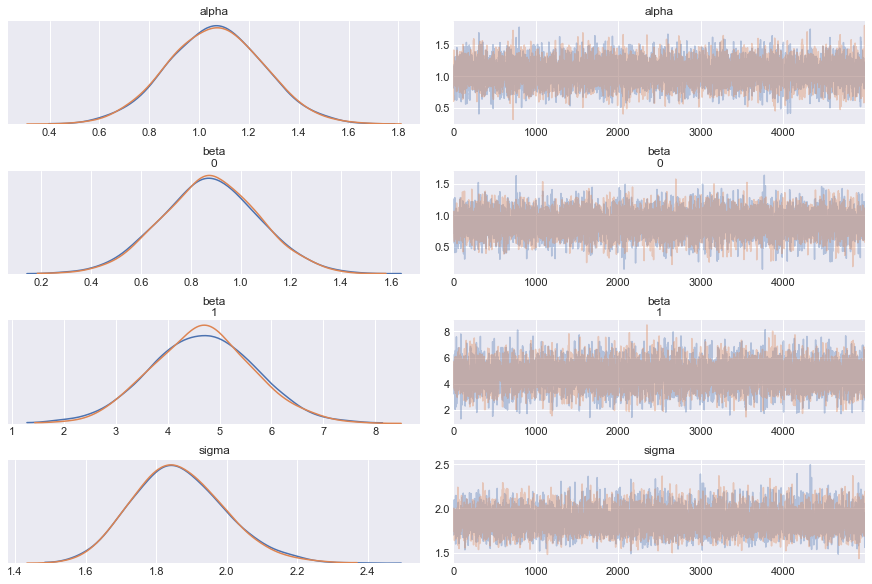

In [50]:
pm.traceplot(trace);

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. The beta variable, being vector-valued, produces two histograms and two sample traces, corresponding to both predictor coefficients.

For example, we see that beta[0] is predicted with a much higher certainty than beta[1].

The summary function provides a text-based output of common posterior statistics:

In [51]:
pm.summary(trace)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


mean        sd  mc_error   hpd_2.5  hpd_97.5        n_eff  \
alpha    1.066445  0.189578  0.001709  0.698391  1.441855  8837.996118   
beta__0  0.877355  0.193255  0.001973  0.507001  1.266856  9754.773968   
beta__1  4.677115  0.990886  0.011067  2.672737  6.568183  8112.482998   
sigma    1.865537  0.129576  0.001168  1.615508  2.119141  9117.985395   

             Rhat  
alpha    0.999902  
beta__0  0.999948  
beta__1  0.999909  
sigma    0.999960

In [53]:
trace['alpha'][:1000]

array([0.89814818, 1.10541486, 0.96643365, 1.13467747, 0.9252354 ,
       1.07300112, 1.01309361, 1.15490181, 0.8089724 , 0.82439943,
       1.08107502, 1.18892739, 1.05486995, 0.96128765, 0.9569155 ,
       1.0049608 , 1.01674957, 0.74116783, 0.62059358, 1.02261498,
       0.99320454, 0.89143939, 1.31306643, 1.03190225, 1.00327962,
       1.21328916, 1.25931904, 1.20369919, 1.07616858, 0.91708943,
       1.13529877, 0.9134594 , 1.1669334 , 0.94433168, 1.17730692,
       1.0076208 , 1.05687604, 0.95584467, 0.82472087, 0.61730036,
       1.02794579, 1.45882069, 0.79642946, 1.13150714, 1.06644271,
       1.01583929, 1.02073913, 1.20947549, 1.25770857, 0.83481659,
       1.10807335, 1.0562911 , 1.08051773, 0.98291832, 1.1491376 ,
       1.00019732, 1.09975676, 1.05329386, 1.11706637, 0.76819969,
       0.9826097 , 1.29144791, 1.31300528, 0.74759378, 0.85441873,
       0.88735622, 0.85357907, 1.01926873, 1.09183044, 0.95306963,
       1.26647091, 0.9112616 , 0.65963757, 0.98467086, 1.05425

In [54]:
np.asarray(trace['alpha']).shape

(10000,)

In [55]:
trace['alpha'].mean()

1.0664445144895347

Better (throwing away the first 1,000 guesses):

In [56]:
trace['alpha'][:1000].mean()

1.0551505325026573

In [57]:
trace['beta'][:1000][0].mean()

2.6964157090031673

In [58]:
trace['beta'][:1000][0]

array([1.24501666, 4.14781476])

In [59]:
trace['beta'][:1000][1].mean()

2.22465265422574

In [60]:
trace['sigma'][:1000].mean()

1.8627573520866914

Let's plot fake data from our **improved** model.

In [61]:
mus_improved = (
    trace['alpha'][1000:].mean() + 
    trace['beta'][1000:][0].mean()*X1 + 
    trace['beta'][1000:][1].mean()*X2
)
Y_sim_improved = [
    get_truncated_normal(
        mean=mux, sd=trace['sigma'][1000:].mean(), low=-2, upp=3) 
    for mux in mus_improved
]
Y_sim_random_variates = [Y_sim_improved[i].rvs() for i in range(100)]
len(Y_sim_random_variates)

100

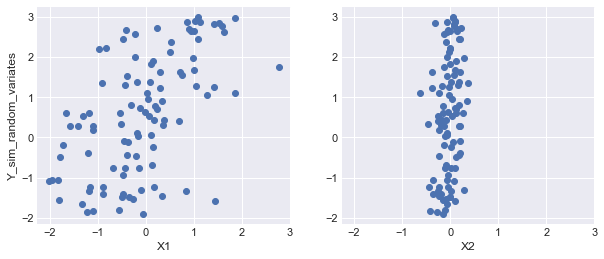

In [62]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y_sim_random_variates)
axes[1].scatter(X2, Y_sim_random_variates)
axes[0].set_ylabel('Y_sim_random_variates'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

不错! And let's plot the observed data superimposed on top of the fake data, to observe how good of a model we have. Red is original (observed) data, and blue is fake (simulated) data.

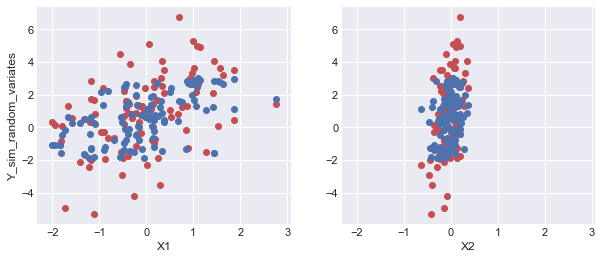

In [63]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y, color='r')
axes[0].scatter(X1, Y_sim_random_variates, color='b')
axes[1].scatter(X2, Y, color='r')
axes[1].scatter(X2, Y_sim_random_variates, color='b')
axes[0].set_ylabel('Y_sim_random_variates'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

Whaddya think?

</br >
<img src="images/homer.jpg" width=150 />


[Forest plots](https://en.wikipedia.org/wiki/Forest_plot) are a good way to get a visual on the errors we are making for each model parameter.

In [64]:
pm.forestplot(trace[1000:], varnames=[v.name for v in basic_model.vars])

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


KeyError: "['sigma_log__'] var names are not present in dataset"

And this is using **posterior predictive checks**, a simpler way to generate simulations of fake data without having to refer to model parameters.

Posterior predictive checks (PPCs) analyze the degree to which data generated from the model deviate from data generated from the true distribution.

Here below, `fake_data` will contains 1000 generated data sets (containing 100 samples each), each using a different parameter setting from the posterior:

In [65]:
fake_data = pm.sample_ppc(trace, samples=1000, model=basic_model, size=100)
fake_data

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 1000/1000 [00:05<00:00, 196.14it/s]


{'Y_obs': array([[[-1.71196749,  0.57432385,  0.25620634, ..., -2.64253606,
           0.22637297,  2.22220641],
         [ 1.36937612, -1.78324295, -0.58812458, ..., -3.42361195,
          -2.1434062 , -0.0324663 ],
         [ 2.5641274 ,  4.02109032, -1.62496417, ..., -0.57231769,
          -2.76454568, -0.96356239],
         ...,
         [-3.90911139, -1.83895471,  3.65144977, ...,  1.08855965,
           2.31577179,  0.75608375],
         [ 2.80999543,  1.93550339,  5.08023254, ...,  2.09964893,
           2.5545068 ,  2.26679569],
         [-3.98907234, -2.66091314, -0.24834391, ...,  0.46276909,
           2.51834386, -0.16790422]],
 
        [[ 2.71694221, -2.51261165,  3.39422111, ...,  3.41862966,
           0.92381261, -1.52497203],
         [-2.06691942, -3.09398646, -6.80048838, ...,  1.81311278,
           1.01823879, -0.78170535],
         [ 1.76514379,  3.07478523, -1.11577894, ..., -0.63924864,
           2.35220905, -1.19629127],
         ...,
         [-1.06001239,  

In [66]:
len(fake_data['Y_obs'])

1000

In [67]:
np.asarray(fake_data['Y_obs']).shape

(1000, 100, 100)

Let's plot the first sample of the last simulation.

In [ ]:
y_fake = fake_data['Y_obs'][999][0]
len(y_fake)

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y, color='r')
axes[0].scatter(X1, y_fake, color='b')
axes[1].scatter(X2, Y, color='r')
axes[1].scatter(X2, y_fake, color='b')
axes[0].set_ylabel('y_fake'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

### Looking at errors

We know the error we're making on the model's parameters (yielded by `pm.traceplot(trace)`). What are the errors we're making on point estimates (or *moments*) of the data, for the last simulation? Let's look at the mean point estimate: 

In [69]:
Y.mean()

0.8583742086444084

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


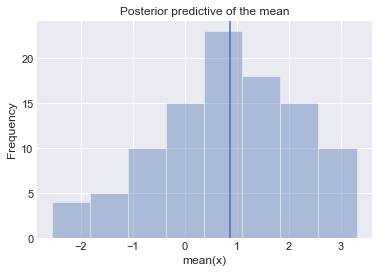

In [68]:
import seaborn as sns
ax = plt.subplot()
sns.distplot([n.mean() for n in fake_data['Y_obs'][500]], kde=False, ax=ax)
ax.axvline(Y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

And what's the error we're making on the simulated data itself? Let's plot mean predicted values with error bars to give sense of uncertainty in the simulation.

Text(0, 0.5, 'outcome')

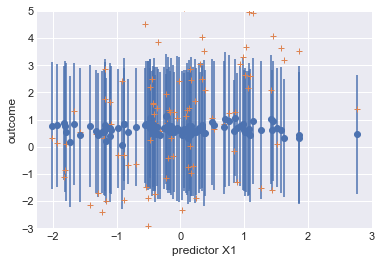

In [70]:
plt.errorbar(x=X1, y=np.asarray(fake_data['Y_obs'][999]).mean(axis=0), yerr=np.asarray(fake_data['Y_obs'][999]).std(axis=0), linestyle='', marker='o')
plt.plot(X1, Y, '+')
plt.ylim(-3., 5.)
plt.xlabel('predictor X1')
plt.ylabel('outcome')

## Revisiting Least Squares

So we simulated datapoints with **posterior predictive checks** (ppc). Is the **mean** of these **simulated points**, per outcome (e.g. per $X1$ and $X2$) close to a **linear least squares** fit of our data? In other words, do we on average get datapoints that ressemble what we would get with a linear least squares fit?

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between modelled $\hat{y}$ and observed $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i + \beta_2 z_i])^2 = \sum_i \epsilon_i^2 $$  
</div>


In [71]:
sum_of_squares_1 = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)
sum_of_squares_2 = lambda θ, x, z, y: np.sum((y - θ[0] - θ[1]*x - θ[2]*z) ** 2)

In [72]:
from scipy.optimize import fmin

x = X1
z = X2
f = (fake_data['Y_obs'][999]).mean(axis=0)
y = Y

b0, b1 = fmin(sum_of_squares_1, [1,1], args=(x,y))
print(b0, b1)

Optimization terminated successfully.
         Current function value: 416.995555
         Iterations: 26
         Function evaluations: 49
0.9159012418030211 0.9427991242987441


In [73]:
c0, c1 = fmin(sum_of_squares_1, [0,1], args=(z,y))
print(c0, c1)

Optimization terminated successfully.
         Current function value: 413.488162
         Iterations: 70
         Function evaluations: 128
1.0214672738574628 4.939849152237557


In [74]:
d0, d1, d2 = fmin(sum_of_squares_2, [0,1,1], args=(x,z,y))
print(d0, d1, d2)

Optimization terminated successfully.
         Current function value: 340.660975
         Iterations: 111
         Function evaluations: 198
1.0647858882536432 0.8801705886831164 4.626002995435739


In [75]:
e0, e1 = fmin(sum_of_squares_1, [0,1], args=(x,f))
print(e0, e1)

Optimization terminated successfully.
         Current function value: 3.586672
         Iterations: 72
         Function evaluations: 133
0.6466103963292262 0.0038383754764859846


In [76]:
#for xi, zi, yi in zip(x,z,y):
#    ax.plot([xi]*2, [yi, b0 + b1*xi + b2*zi], 'k:')
    
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(16,4))
axes[0].set_xlim([-3,3])
axes[0].set_ylim([-3,5])
axes[0].scatter(X1, Y)
axes[0].plot([-3,3], [b0 - b1*3, b0 + b1*3]) # we join the points x, y=b0+b1*x for x = -3 and x = 3
axes[0].scatter(X1, (fake_data['Y_obs'][999]).mean(axis=0))

axes[1].set_xlim([-3,3])
axes[1].set_ylim([-3,5])
axes[1].scatter(X1, Y)
axes[1].plot([-3,3], [e0 - e1*3, e0 + e1*3], color='y')
axes[1].scatter(X1, (fake_data['Y_obs'][999]).mean(axis=0))

axes[2].set_xlim([-3,3])
axes[2].set_ylim([-3,5])
axes[2].scatter(X1, Y)
axes[2].plot([-3,3], [d0 - d1*3 - d2*3, d0 + d1*3 + d2*3])

axes[3].set_xlim([-3,3])
axes[3].set_ylim([-3,5])
axes[3].scatter(X2, Y)
axes[3].plot([-3,3], [c0 - c1*3, c0 + c1*3])

axes[0].set_ylabel('Y'); axes[0].set_xlabel('Fig 1, X1'); axes[1].set_xlabel('Fig 2, X1'); axes[2].set_xlabel('Fig 3, X1'); 
axes[3].set_xlabel('Fig 4, X2');

Figures:
* Figure 1: (X1, Y) data (blue dots), its linear least squares (blue line) with respect to X1, and the mean points of simulation #999 in yellow
* Figure 2: (X1, Y) data (blue dots), the linear least squares (yellow line) of the mean points of simulation #999 (same as figure 1!), and the mean points of simulation #999 (yellow dots)
* Figure 3: (X1, Y) data (blue dots) and the linear least squares (blue line) with respect to *both* X1 and X2
* Figure 4: (X2, Y) data (blue dots) and the linear least squares (blue line) with respect to X2

So ***yes***, the mean point estimate of our Bayesian simulated data coincides with least squares fit regression!

So what's the advantage of Bayyesian linear estimation over linear squares fit? 

* Linear squares fit is computationally ***more intractable*** in many dimensions
* Linear squares fit ***does not yield error error bars*** the way Bayesian estimation
* Most importantly: linear least squares yeilds a model that is blatantly artificial: A straight line. Whereas Bayesian estimation yields a simulated model that *looks like real data*!

However, minimizing the distance between the line and the data is equivalent to maximizing the probability of matching the data by manipulating the prior parameters, from a probabilistic mean point estimate point of view. Look [here](https://wiseodd.github.io/techblog/2017/01/05/bayesian-regression/) and [here](http://katbailey.github.io/post/from-both-sides-now-the-math-of-linear-regression/) for the math involved to proove that.

# Conclusion and homework

Bayesian linear estimation is used a lot in all kinds of data modeling domains. 

Your homework will be to take a Bayesian data modeling use case notebook I will post today, and use it on a different data set.  